## Working with data
### Based on python lessons from Mariela Perignon 
https://github.com/mperignon/python-lessons/

One of the best options for working with tabular data in python is to use the Python Data Analysis Library (a.k.a. pandas). The Pandas library provides data structures, produces high quality plots with matplotlib and integrates nicely with other libraries that use NumPy (which is another Python library) arrays.

We import the pandas library using the common nickname pd as below. (You can install pandas with `conda install pandas` on the command line).

In [2]:
import pandas as pd

Imagine we are studying the species and weight of animals caught in plots in a study area. The data sets are stored in .csv (comma separated value) format. Within the .csv files, each row holds information for a single animal, and the columns represent: record_id, month, day, year, plot, species, sex, wgt.

We want to:

* Load the data into memory in Python.
* Calculate some summary statistics about our data
* Plot these statistics

### Reading Data using pandas

We will begin by downloading our survey data which are in CSV format. 

In [ ]:
!curl -O https://raw.githubusercontent.com/mperignon/python-lessons/gh-pages/data/surveys.csv

We can use Pandas read_csv function to pull the file directly into a DataFrame [http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe]. Because we have imported the whole pandas library we refer to the function by `LibraryName.FunctionName`. This is a fairly large dataset so we assign it to a variable.

In [ ]:
survey_data = pd.read_csv('surveys.csv')

Note that when you view a pandas dataframe it looks nice.

In [ ]:
survey_data

You can view both the type of the `survey_data` variable and the type of each variable inside it.

In [ ]:
print(type(survey_data))
print(survey_data.dtypes)

The type method tell us that survey_data is `<class 'pandas.core.frame.DataFrame'>` (aka a pandas DataFrame). Int64 represents numeric integer values - int64 cells can not store decimals. Object represents strings (letters and numbers). Float64 represents numbers with decimals.

Note that Pandas and Python use slightly different names for data types. 

| Pandas Type | Native Python Type | Description |
|-------------|--------------------|-------------|
| object | string | The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings). |
| int64  | int | Numeric characters. 64 refers to the memory allocated to hold this character. |
| float64 | float | Numeric characters with decimals. If a column contains numbers and NaNs(see below), pandas will default to float64, in case your missing value has a decimal. |

There are multiple methods that can be used to summarize and access the data stored in dataframes. Note that we call the method by using `ObjectName.method`. 

### Challenge
#### Explore methods associated with a pandas dataframe. What do the following do?

`ObjectName.columns`  
`ObjectName.head()`  
`ObjectName.head(15)`  
`ObjectName.tail()`  
`ObjectName.shape`  
Take note of the output of the shape method. In what format does it return the shape of the DataFrame?

### Calculating statistics in a pandas DataFrame

We've read our data into Python. Now, let's perform some quick summary statistics to learn more about the data that we're working with. We might want to know how many animals were collected in each plot, or how many of each species were caught. We can perform summary stats quickly using groups. But first we need to figure out what we want to group by.

Let's begin by exploring our data:


In [ ]:
survey_data.columns

This gives us a pandas Index containing the column names. This is similar to a list, except you can't change it, and it has its own set of methods (we won't go into them, but you can check out the documentation for `pandas.Index`.

We can get a list of the species using the `unique` function in the pandas library (remember we nicknamed it pd) applied to the `species` column of our data.

In [ ]:
pd.unique(survey_data.species)

Or we can use the `unique` method on a column of our dataset.

In [ ]:
survey_data.species.unique()

In [ ]:
survey_data['species'].unique()

Note that the output is a numpy array. NumPy is "the fundamental package for scientific computing with Python". A numpy array is an N-dimensional array object containing data of type `dtype`, where in this case `dtype` is object.

### Groups in Pandas

We are often be interested in calculating summary statistics grouped by subsets or attributes within fields of our data. For example, we can calculate the average weight of all samples, which we can do using the `describe` method on this column of our pandas dataframe.

In [ ]:
survey_data['wgt'].describe()

We can also calculate each specific metric separately:

In [ ]:
survey_data['wgt'].min()
survey_data['wgt'].max()
survey_data['wgt'].mean()
survey_data['wgt'].std()
survey_data['wgt'].count()

If we want to summarize by one or more variables, as we did using `dplyr` in `R`, we use the .groupby method in pandas. Once we've created a groupby DataFrame, we can quickly calculate summary statistics by a group of our choice.

In [ ]:
# Group data by sex
survey_by_sex = survey_data.groupby('sex')
# summary statistics for all numeric columns by sex
survey_by_sex.describe()

In [ ]:
# provide the mean for each numeric column by sex
survey_by_sex.mean()

Note that you can string your calls to methods together as well, for example to get the mean of the data-grouped-by-sex.

In [ ]:
survey_data.groupby('sex').mean()

The groupby command is powerful in that it allows us to quickly generate summary stats. This is also useful for initial examination of our data. We can immediately notice some unusual values in our data that we might need to explore further. For example, unless we're working with butterflies, Z is unlikely to be a sex. Also, it looks like there are no weight values for the species that is of sex "R".

### Challenge

How many records contain the sex designations "Z", "P" and "R"?

Group by `['plot','sex']` and take the mean. What happens?

Get summary statistics for weight for each plot in your data.

In [ ]:
#insert challenge answers here

### Quickly Creating Summary Counts in Pandas

Let's count the samples of each unique species that appear in our data. We can do this in a few ways. We'll use `groupby` combined with a `count()` method.

In [ ]:
species_counts = survey_data.groupby('species').record_id.count()

This returns a pandas Series, which "is a one-dimensional labeled array capable of holding any data type".
If we just want to know about the species "DO", we can get this item out of our series as we did with a list, but this time we can access records by their labels.

In [ ]:
survey_data.groupby('species').record_id.count()['DO']

### Basic Math Functions

We might be interested in performing a calculation on an entire column of our data. For example, we might need to convert between units or normalize the data according to a mean or the area.

In [ ]:
# convert weight from grams to kilograms
survey_data['wgt']*0.0001

Here we use square brackets [] to select a subset of a Python dataframe (the wgt column), just like we did with a list.

Note that this vector multiplication, which was standard in R, works on a pandas series, but would not work on a standard python list, even though you might be thinking about the series as a labeled list.

In [ ]:
list(survey_data['wgt'])*0.0001

Now let's plot our summary stats. We can use the pandas `plot` method.

In [10]:
% matplotlib inline

# create a bar chart of number of each species
species_counts.plot(kind='bar')

NameError: name 'species_counts' is not defined

We can also look at how many species of animals were captured in each plot. We take our data, group it by plot, get just the species series and count the number of unique elements in that series for each group. We use the method `nunique`, which returns the number of unique elements in the object (as opposed to what those unique elements are).

In [ ]:
sp_count=survey_data.groupby('plot').species.nunique()
sp_count

Let's plot that too

In [ ]:
sp_count.plot(kind='bar')

### Challenge
Plot the average weight of individuals in each plot.

In [ ]:
weight=survey_data.groupby('plot').wgt.mean()
weight.plot(kind='bar')

If we're comparing proportions (e.g. number of each species) we might want a stacked bar plot. We need to group by species as well as plot, get our variable, and calculate the statistic for each group. Passing `as_index=False` will return the groups that you are aggregating over, if they are named columns.

In [ ]:
sp_plot=survey_data.groupby(['species','plot'], as_index=False).record_id.count()
sp_plot

This puts the data in what we were calling "long" form in R. It turns out that we need the data in "wide" form for the plot method of pandas. To reshape the data use the pivot function.

In [ ]:
sp_plot=sp_plot.pivot(index='plot', columns='species', values='record_id')
sp_plot

In [ ]:
my_plot=sp_plot.plot(kind='bar',stacked=True,title="Total counts of each species by plot",legend=False)
my_plot.set_xlabel("Plot")
my_plot.set_ylabel("Num Spp")

### Indexing & slicing in Python

We often want to work with subsets of a DataFrame object instead of the whole thing. We have been selecting single columns by name. We can also select multiple columns.

In [ ]:
# select the species and plot columns from the DataFrame
survey_data[['species', 'plot']]
# what happens when you flip the order?
survey_data[['plot', 'species']]

Just as we did with lists in the previous lesson, we use the square brackets [] to extract a subset of a DataFrame:

In [ ]:
# select the first, second and third rows from the surveys variable
survey_data[0:3]
# select the first 5 rows (rows 0,1,2,3,4)
print(survey_data[:5])
# select the last element in the list
survey_data[-1:]

We can also use slicing to re-assign different values to some subset of the DataFrame. Like lists, DataFrames are mutable objects, meaning that they can be changed in place. 

### Detour to 04-data structures 

Before continuing, let's make a copy of our DataFrame to play with so we don't accidentally modify the original imported data.

In [ ]:
# copy the surveys dataframe so we don't modify the original DataFrame
surveys_copy = survey_data.copy()

# set the first three rows of data in the DataFrame to 0
surveys_copy[0:3] = 0

### Slicing subsets of rows and columns in Python

We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing. We have to use one of two methods, depending on what we use as indices:

`loc`: indexing via labels  
`iloc`: indexing via integers

To select a subset of rows AND columns from our DataFrame, we can use the iloc method. For example, we can select month, day and year (columns 2, 3 and 4 if we start counting at 1), like this:

In [ ]:
surveys_copy.iloc[0:3, 1:4]

Notice that we asked for a slice from 0:3 and this yielded 3 rows of data. When you ask for 0:3, you are actually telling python to start at index 0 and select rows 0, 1, 2 up to but not including 3.

Let's explore some other ways to index and select subsets of data:

In [ ]:
# select all columns for rows of index values 0 and 10
surveys_copy.loc[[0,10], :]

In [ ]:
# select only three columns of the first row
surveys_copy.loc[0, ['species', 'plot', 'wgt']]

Subsetting Data Using Criteria

We can also select a subset of our data using some criteria. For example, we can select all rows that have a year value of 2002:

In [ ]:
surveys_copy[surveys_copy.year == 2002]

We can also select all rows that do not contain the year 2002.

In [ ]:
surveys_copy[surveys_copy.year != 2002]

We can use sets of multiple criteria, too:

In [ ]:
surveys_copy[(surveys_copy.year >= 1980) & (surveys_copy.year <= 1985)]

### Challenge

* How many samples contain data from the year 1999 and have weight values less than or equal to 8?

You can use the `isin` method in Python to query a DataFrame based upon a list of values like this:
dataframe[dataframe['col name'].isin([listGoesHere])]

* How many samples contain species of sex "Z" or sex "R" or sex "P" in the survey?

* Selects all rows that are not of sex "M" or "F" in the data.

In [ ]:
print(len(survey_data[survey_data['species'].isin(['DM','AB'])]))
survey_data[(survey_data.sex != 'M') & (survey_data.sex !='F')]

### Using Masks

A mask can be useful to locate where a particular subset of values exist or don't exist. Masks are BOOLEAN objects. Booleans can only take the values of true or false:

When Python creates a mask, it performs the comparison operation for each value in the object. The mask is a new object that is the same shape as the original object but with a True or False value for each index location.

Let's identify all locations in the survey data that have null (missing or NaN, for Not-a-Number) data values. We can use the `isnull` method to do this. Each cell that has a null value will be assigned a value of True in the new mask:

In [ ]:
pd.isnull(surveys_copy)

To select the rows where there are null values, we can use the mask as an index to subset the data:

In [ ]:
# Use the .any method to select the rows (axis=1) with one or more NaN
survey_nan=pd.isnull(surveys_copy)
surveys_copy[survey_nan.any(axis=1)]

Note that there are many null or NaN values in the wgt column of our DataFrame. We will explore different ways of dealing with these later.

We can also run `isnull` on a particular column. We are using the Boolean object as an index and then asking python to select rows that have a NaN value for weight:

In [ ]:
survey_data[survey_data.wgt.isnull()]

### Challenge

* Create a new DataFrame that only contains observations with sex values that are not female or male. 
* Assign each sex value in the new DataFrame to a new value of 'x'. 
* Determine the number of null values in the subset.
* Create a new DataFrame that contains only observations that are of sex male or female and where weight values are greater than 0. 
* Create a stacked bar plot of average weight by plot with male vs female values stacked for each plot.

### Where Are the NaN's?

Let's explore the NaN values in our data a bit further. We can use the tools we learned so far to figure out how many rows contain NaN values for weight. 

In [ ]:
len(surveys_copy[pd.isnull(surveys_copy.wgt)])

We can also create a new subset from our data that only contains rows with weight values > 0 (ie. select meaningful weight values).

In [ ]:
survey_wgt = surveys_copy[surveys_copy.wgt> 0]
len(survey_wgt) # how many rows have wgt values?

We should make conscious decisions about how to manage missing data. This is where we think about how our data will be used and how these values will impact the scientific conclusions made from the data. Should we remove these data? Should we replace NaN with 0? or with the mean value?

### Writing filtered data

As we begin to filter data we might be interested in writing those files separately

In [ ]:
# Select only data for 2002
surveys2000 = survey_data[survey_data.year == 2000]

# Write the new DataFrame to a csv file
surveys2000.to_csv('surveys2002.csv')

### Challenge

Write separate files for each year of the data

In [ ]:
for year in range(survey_data.year.min(),survey_data.year.max()+1):
    survey_year = survey_data[survey_data.year == year]
    survey_year.to_csv('surveys'+str(year)+'.csv')

for year in list(survey_data.year.unique()):
    survey_year = survey_data[survey_data.year == year]
    survey_year.to_csv('surveys'+str(year)+'.csv')

## Joining data

We can combine information on our surveys with information on the species that were found (for which we currently only have codes). We combine DataFrames using columns in each dataset that contain common values (a common unique id) as a guide. Combining DataFrames using a common field is called "joining". The columns containing the common values are called "join key(s)". Joining DataFrames in this way is often useful when one DataFrame is a "lookup table" containing additional data that we want to include in the other.

NOTE: This process of joining tables is similar to what we do with tables in an SQL database.

For example, the species.csv file that we've been working with is a lookup table. This table contains the genus, species, and taxon code for 55 species. The species code is unique for each line. These species are identified in our survey data as well using the unique species code. Rather than adding 3 more columns for the genus, species and taxa to each of the 35,549 line Survey data table, we can maintain the shorter table with the species information. When we want to access that information, we can create a query that joins the additional columns of information to the survey data.

In [ ]:
#get species info
!curl -O https://raw.githubusercontent.com/mperignon/python-lessons/gh-pages/data/species.csv

In [3]:
spp = pd.read_csv('species.csv', keep_default_na=False, na_values=[""])

Take note that the read_csv method we used can take some additional options which we didn't use previously. Many functions in python have a set of options that can be set by the user if needed. In this case, we have told Pandas to assign empty values in our CSV to NaN keep_default_na=False, na_values=[""]. [http://pandas.pydata.org/pandas-docs/dev/generated/pandas.io.parsers.read_csv.html](More about all of the read_csv options here.)

We can reload our survey data this way as well

In [4]:
survey_data = pd.read_csv('surveys.csv', keep_default_na=False, na_values=[""])

In [ ]:
spp.columns

In [ ]:
survey_data.columns

In our example, the join key is the column containing the two-letter species identifier, which is called species in survey_data and species_id in spp.

Now that we know the fields with the common species ID attributes in each DataFrame, we are almost ready to join our data. However, since there are different types of joins, we also need to decide which type of join makes sense for our analysis.

#### Inner joins

The most common type of join is called an inner join. An inner join combines two DataFrames based on a join key and returns a new DataFrame that contains only those rows that have matching values in both of the original DataFrames.

Inner joins yield a DataFrame that contains only rows where the value being joins exists in BOTH tables.

The pandas function for performing joins is called merge and an Inner join is the default option:

In [5]:
merged_inner = pd.merge(left=survey_data,right=spp, left_on='species', right_on='species_id')

print(len(survey_data))
len(merged_inner)

35549


34786

The result of an inner join is a new DataFrame that contains the combined set of columns. It only contains rows that have two-letter species codes that are the same in both the DataFrames. In other words, if a row in survey has a value of species that does not appear in the species_id column of spp, it will not be included in the DataFrame returned by an inner join. Similarly, if a row in spp has a value of species_id that does not appear in the species column of survey, that row will not be included in the DataFrame returned by an inner join.

The two DataFrames that we want to join are passed to the merge function using the left and right argument. The left_on='species' argument tells merge to use the species column as the join key from survey (the left DataFrame). Similarly , the right_on='species_id' argument tells merge to use the species_id column as the join key from spp (the right DataFrame). For inner joins, the order of the left and right arguments does not matter.

The result merged_inner DataFrame contains all of the columns from survey (record id, month, day, etc.) as well as all the columns from spp (species id, genus, species, and taxa). Because both original DataFrames contain a column named species, pandas automatically appends a_x to the column name from the left DataFrame and a_y to the column name from the right DataFrame.

Notice that merged_inner has fewer rows than survey. This is an indication that there were rows in survey with value(s) for species that do not exist as value(s) for species_id in spp.



#### Left joins

What if we want to add information from species to survey without losing any of the information from survey? In this case, we use a different type of join called a "left outer join", or a "left join".

Like an inner join, a left join uses join keys to combine two DataFrames. Unlike an inner join, a left join will return all of the rows from the left DataFrame, even those rows whose join key(s) do not have values in the right DataFrame. Rows in the left DataFrame that are missing values for the join key(s) in the right DataFrame will simply have null (i.e., NaN or None) values for those columns in the resulting joined DataFrame.

Note: a left join will still discard rows from the right DataFrame that do not have values for the join key(s) in the left DataFrame.

A left join is performed in pandas by calling the same merge function used for inner join, but using the how='left' argument:

In [6]:
merged_left = pd.merge(left=survey_data,right=spp, how='left', left_on='species', right_on='species_id')

print(len(survey_data))
len(merged_left)

35549


35549

The result DataFrame from a left join (merged_left) looks very much like the result DataFrame from an inner join (merged_inner) in terms of the columns it contains. However, unlike merged_inner, merged_left contains the same number of rows as the original surveysSub DataFrame. When we inspect merged_left, we find there are rows where the information that should have come from speciesSub (i.e., species_id, genus, species_y, and taxa) is missing (they contain NaN values):

In [ ]:
merged_left[ pd.isnull(merged_left.species_id) ]

These rows are the ones where the value of species from survey (in this case, NaN) does not occur in species.

The pandas merge function supports two other join types:

#### Right (outer) join
Invoked by passing how='right' as an argument. Similar to a left join, except all rows from the right DataFrame are kept, while rows from the left DataFrame without matching join key(s) values are discarded.

#### Full (outer) join: 
Invoked by passing how='outer' as an argument. This join type returns the all pairwise combinations of rows from both DataFrames; i.e., the result DataFrame will contain rows (left_1, right_1), (left_1, right_2), (left_2, right_1), (left_2, right_2), etc. This join type is very rarely used.

### Challenge

* Calculate and plot the distribution of taxa by plot
* Obtain the file containing information about treatment used on each plot.

In [ ]:
!curl -O https://raw.githubusercontent.com/mperignon/python-lessons/gh-pages/data/plots.csv

* Make separate plots for taxa for control vs rodent exclosure plots. 

* Plot the biodiversity of control vs rodent exclosure plots. 

Biodiversity index = number of species in the plot / total number of individuals in the plot

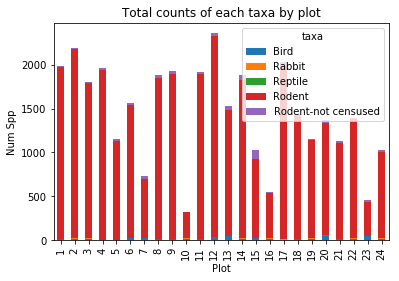

In [11]:
taxa_plot=merged_left.groupby(['taxa','plot'], as_index=False).record_id.count()
taxa_plot=taxa_plot.pivot(index='plot', columns='taxa', values='record_id')
my_plot=taxa_plot.plot(kind='bar',stacked=True,title="Total counts of each taxa by plot")
my_plot.set_xlabel("Plot")
my_plot.set_ylabel("Num Spp")

In [12]:
plot_info = pd.read_csv('plots.csv')
print(merged_left.columns)
plot_info.columns


Index(['record_id', 'month', 'day', 'year', 'plot', 'species_x', 'sex', 'wgt',
       'species_id', 'genus', 'species_y', 'taxa'],
      dtype='object')


Index(['plot_id', 'plot_type'], dtype='object')

In [13]:
with_plot_info = pd.merge(left=merged_left,right=plot_info, left_on='plot', right_on='plot_id')

In [ ]:
plot_info.plot_type.unique()

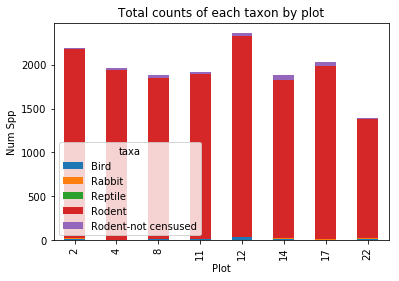

In [14]:
with_plot_info1 = with_plot_info[with_plot_info['plot_type']=='Control']
taxa_plot=with_plot_info1.groupby(['taxa','plot'], as_index=False).record_id.count()
taxa_plot=taxa_plot.pivot(index='plot', columns='taxa', values='record_id')
my_plot=taxa_plot.plot(kind='bar',stacked=True,title="Total counts of each taxon by plot")
my_plot.set_xlabel("Plot")
my_plot.set_ylabel("Num Spp")

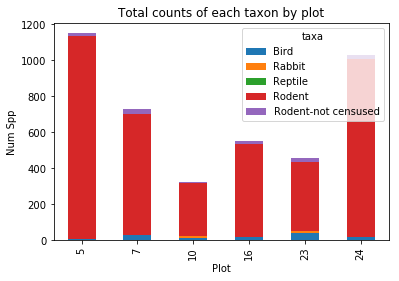

In [15]:
with_plot_info1 = with_plot_info[with_plot_info['plot_type']=='Rodent Exclosure']
taxa_plot=with_plot_info1.groupby(['taxa','plot'], as_index=False).record_id.count()
taxa_plot=taxa_plot.pivot(index='plot', columns='taxa', values='record_id')
my_plot=taxa_plot.plot(kind='bar',stacked=True,title="Total counts of each taxon by plot")
my_plot.set_xlabel("Plot")
my_plot.set_ylabel("Num Spp")

In [16]:
#number of species in the plot / total number of individuals in the plot
#df1 = df1.assign(e=e.values)


with_plot_info1 = with_plot_info[with_plot_info['plot_type']=='Rodent Exclosure']  #filter so make a copy
taxa_plot1=with_plot_info1.groupby('plot', as_index=False).record_id.count()  #count num in plot
taxa_plot2=with_plot_info1.groupby('plot').species_id.nunique()  #count num sp in plot
taxa_plot2 = taxa_plot2.reset_index()
taxa_plot3 = pd.merge(left=taxa_plot1,right=taxa_plot2, left_on='plot', right_on='plot')
taxa_plot3 = taxa_plot3.assign(biodiv = taxa_plot3.species_id / taxa_plot3.record_id)


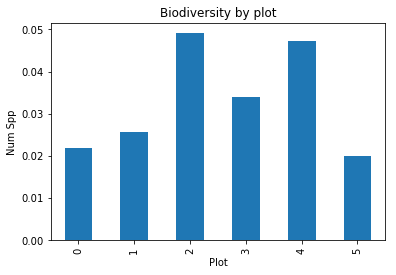

In [17]:
my_plot=taxa_plot3.biodiv.plot(kind='bar',title="Biodiversity by plot")
my_plot.set_xlabel("Plot")
my_plot.set_ylabel("Num Spp")

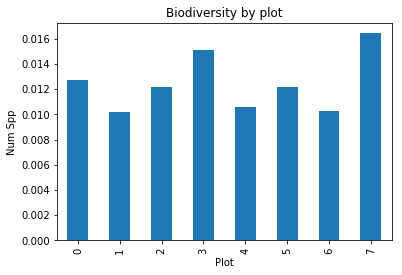

In [18]:
with_plot_info1 = with_plot_info[with_plot_info['plot_type']=='Control']  #filter so make a copy
taxa_plot1=with_plot_info1.groupby('plot', as_index=False).record_id.count()  #count num in plot
taxa_plot2=with_plot_info1.groupby('plot').species_id.nunique()  #count num sp in plot
taxa_plot2 = taxa_plot2.reset_index()
taxa_plot3 = pd.merge(left=taxa_plot1,right=taxa_plot2, left_on='plot', right_on='plot')
taxa_plot3 = taxa_plot3.assign(biodiv = taxa_plot3.species_id / taxa_plot3.record_id)

my_plot=taxa_plot3.biodiv.plot(kind='bar',title="Biodiversity by plot")
my_plot.set_xlabel("Plot")
my_plot.set_ylabel("Num Spp")